In [8]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt

In [9]:
def showimage(image):
    # OpenCV opens images as BRG
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)

# test 1

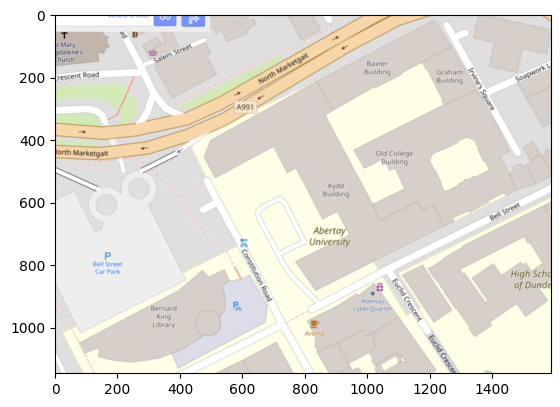

In [10]:
#load image and convert to hsv
img = cv.imread("./testing/diff.png")
showimage(img)


In [11]:
# draw gray box around image to detect edge buildings
h,w = img.shape[:2]
cv.rectangle(img,(0,0),(w-1,h-1), (50,50,50),1)
h,w
# showimage(img)


(1146, 1588)

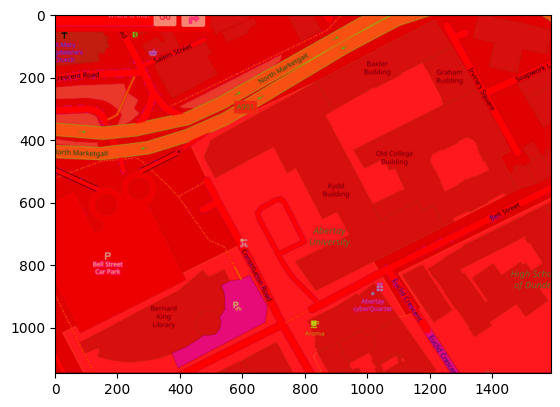

In [12]:
# convert image to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
showimage(hsv)

In [13]:
# define color ranges
low_yellow = (0,28,0)
high_yellow = (27,255,255)

low_gray = (0,0,0)
high_gray = (179,255,233)

In [14]:
# create masks
yellow_mask = cv.inRange(hsv, low_yellow, high_yellow )
gray_mask = cv.inRange(hsv, low_gray, high_gray)



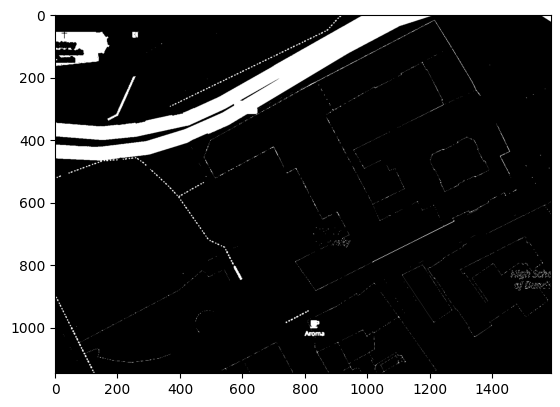

In [15]:
showimage(yellow_mask)

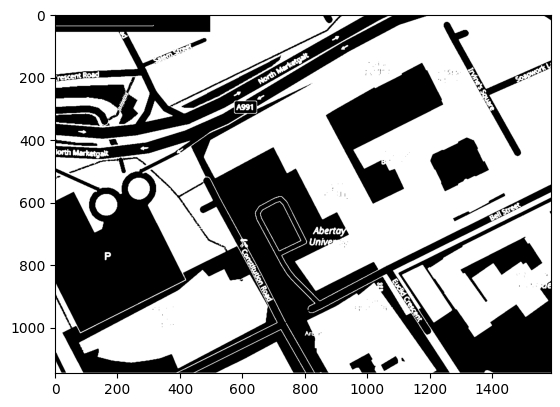

In [16]:
showimage(gray_mask)

In [17]:
# combine masks
combined_mask = cv.bitwise_or(yellow_mask, gray_mask)
kernel = np.ones((3,3), dtype=np.uint8)
combined_mask = cv.morphologyEx(combined_mask, cv.MORPH_DILATE,kernel)

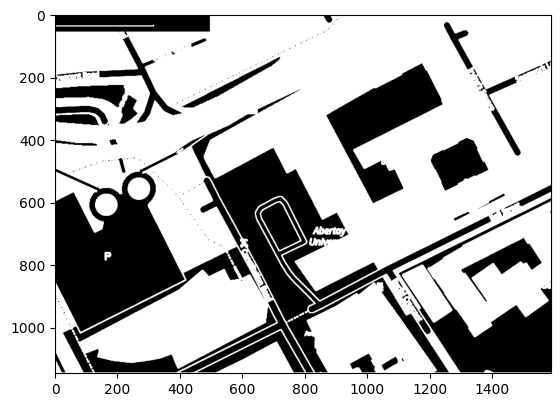

In [18]:
showimage(combined_mask)

In [19]:
# findcontours
contours, hier = cv.findContours(combined_mask,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [20]:
# find and draw buildings
for x in range(len(contours)):
        # if a contour has not contours inside of it, draw the shape filled
        c = hier[0][x][2]
        if c == -1:
                cv.drawContours(img,[contours[x]],0,(0,0,255),-1)

In [21]:
# draw the outline of all contours
for cnt in contours:
        cv.drawContours(img,[cnt],0,(0,255,0),2)

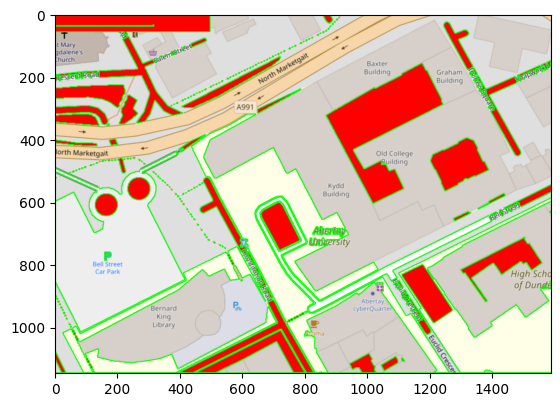

In [22]:
# display results
showimage(img)


# Test 2

In [23]:
img2 = cv.imread("./testing/diff.png")


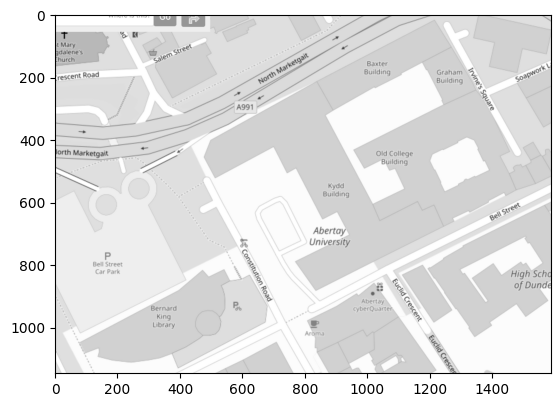

In [24]:
# gray scale
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
showimage(gray)

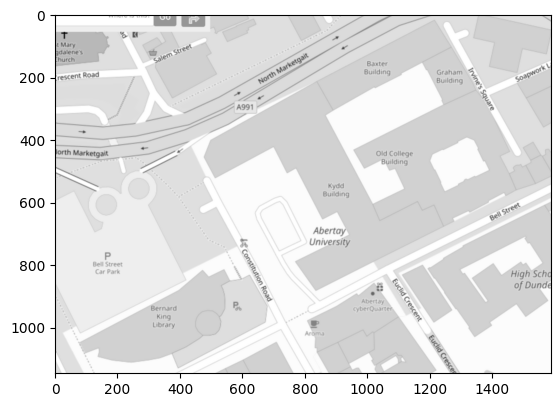

In [25]:
# gaussian blur
blurred = cv.GaussianBlur(gray, (3, 3), 0)
showimage(blurred)

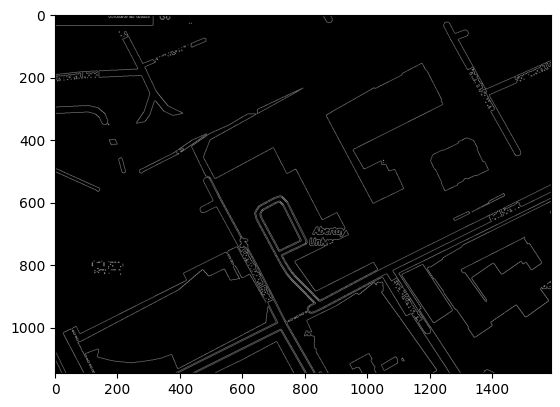

In [26]:
# threshold
thresh = cv.threshold(blurred, 240 ,255, cv.THRESH_BINARY_INV)[1]
# canny edge detection
canny = cv.Canny(thresh, 50, 255, 1)
showimage(canny)

In [27]:
# find contours
cnts = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv.drawContours(img2,[c], 0, (36,255,12), 2)


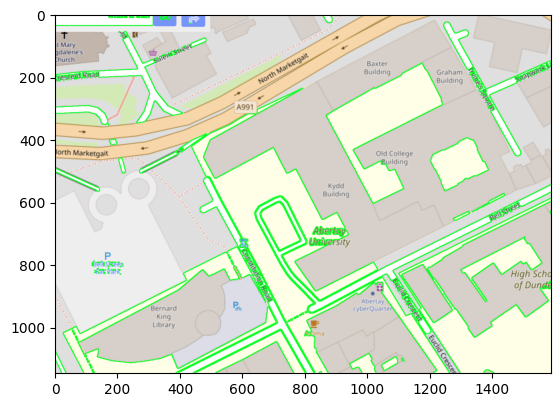

In [28]:
showimage(img2)